In [7]:
from functools import partial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

inv = np.linalg.inv

In [2]:
df = pd.read_csv('regression_data.csv')
df.head(3)

,x,y
0,0.047159,0.220033
1,0.064022,0.179399
2,0.080122,0.195405


## Regularized least squares

In [3]:
def regularized_least_squares(df, regularizer):
    
    # set up design matrices
    PHI = df['x'].to_numpy().reshape(-1, 1)
    PHI = np.hstack([
        PHI,
        np.ones(PHI.shape)
    ])
    T = df['y'].to_numpy().reshape(-1, 1)
    
    assert PHI.shape[0] == T.shape[0]
    
    pseudo_inv = inv(PHI.T @ PHI + np.eye(PHI.shape[1]) * regularizer)
    
    assert pseudo_inv.shape[0] == pseudo_inv.shape[1]
    
    W = pseudo_inv @ PHI.T @ T
    return {'slope':W[0], 'intercept':W[1]}

In [4]:
regularized_least_squares(df, 0.1)

{'slope': array([0.61336595]), 'intercept': array([0.28343368])}

## Plot regression line

In [5]:
def plot_regression_line(df, regularizer):
    
    params = regularized_least_squares(df, regularizer)
    
    x_min, x_max = df['x'].min(), df['x'].max()
    xs = np.arange(x_min, x_max, 0.001)
    ys = params['slope'] * xs + params['intercept']
    
    plt.scatter(df['x'], df['y'])
    plt.plot(xs, ys)
    plt.show()

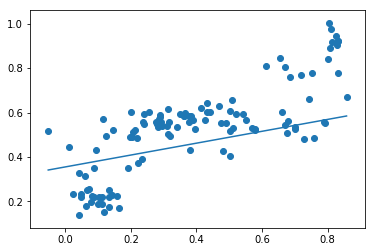

In [19]:
plot_regression_line(df, regularizer=20)

## Animation

In [12]:
def plot_regression_line_for_df(regularizer):
    plot_regression_line(df, regularizer)

In [16]:
_ = interact(
    plot_regression_line_for_df, 
    regularizer=IntSlider(min=0, max=600, value=0, continuous_update=False)
)

interactive(children=(IntSlider(value=0, continuous_update=False, description='regularizer', max=600), Output(…

Question: does the effect of regularization changes with the size of dataset, or magnitude of data?